In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi, sqrt
import numpy as np
import copy as cp
import scipy as sp
import math

In [2]:
dataset = [['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
['4', '4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
['5', '5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
['6', '5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
['7', '4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
['8', '5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
['9', '4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
['10', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
['11', '5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
['12', '4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
['13', '4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
['14', '4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
['15', '5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
['16', '5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
['17', '5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
['18', '5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
['19', '5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
['20', '5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
['21', '5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
['22', '5.1', '3.7', '1.5', '0.4', 'Iris-setosa'],
['23', '4.6', '3.6', '1.0', '0.2', 'Iris-setosa'],
['24', '5.1', '3.3', '1.7', '0.5', 'Iris-setosa'],
['25', '4.8', '3.4', '1.9', '0.2', 'Iris-setosa'],
['26', '5.0', '3.0', '1.6', '0.2', 'Iris-setosa'],
['27', '5.0', '3.4', '1.6', '0.4', 'Iris-setosa'],
['28', '5.2', '3.5', '1.5', '0.2', 'Iris-setosa'],
['29', '5.2', '3.4', '1.4', '0.2', 'Iris-setosa'],
['30', '4.7', '3.2', '1.6', '0.2', 'Iris-setosa'],
['31', '4.8', '3.1', '1.6', '0.2', 'Iris-setosa'],
['32', '5.4', '3.4', '1.5', '0.4', 'Iris-setosa'],
['33', '5.2', '4.1', '1.5', '0.1', 'Iris-setosa'],
['34', '5.5', '4.2', '1.4', '0.2', 'Iris-setosa'],
['35', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
['36', '5.0', '3.2', '1.2', '0.2', 'Iris-setosa'],
['37', '5.5', '3.5', '1.3', '0.2', 'Iris-setosa'],
['38', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
['39', '4.4', '3.0', '1.3', '0.2', 'Iris-setosa'],
['40', '5.1', '3.4', '1.5', '0.2', 'Iris-setosa'],
['41', '5.0', '3.5', '1.3', '0.3', 'Iris-setosa'],
['42', '4.5', '2.3', '1.3', '0.3', 'Iris-setosa'],
['43', '4.4', '3.2', '1.3', '0.2', 'Iris-setosa'],
['44', '5.0', '3.5', '1.6', '0.6', 'Iris-setosa'],
['45', '5.1', '3.8', '1.9', '0.4', 'Iris-setosa'],
['46', '4.8', '3.0', '1.4', '0.3', 'Iris-setosa'],
['47', '5.1', '3.8', '1.6', '0.2', 'Iris-setosa'],
['48', '4.6', '3.2', '1.4', '0.2', 'Iris-setosa'],
['49', '5.3', '3.7', '1.5', '0.2', 'Iris-setosa'],
['50', '5.0', '3.3', '1.4', '0.2', 'Iris-setosa'],
['51', '7.0', '3.2', '4.7', '1.4', 'Iris-versicolor'],
['52', '6.4', '3.2', '4.5', '1.5', 'Iris-versicolor'],
['53', '6.9', '3.1', '4.9', '1.5', 'Iris-versicolor'],
['54', '5.5', '2.3', '4.0', '1.3', 'Iris-versicolor'],
['55', '6.5', '2.8', '4.6', '1.5', 'Iris-versicolor'],
['56', '5.7', '2.8', '4.5', '1.3', 'Iris-versicolor'],
['57', '6.3', '3.3', '4.7', '1.6', 'Iris-versicolor'],
['58', '4.9', '2.4', '3.3', '1.0', 'Iris-versicolor'],
['59', '6.6', '2.9', '4.6', '1.3', 'Iris-versicolor'],
['60', '5.2', '2.7', '3.9', '1.4', 'Iris-versicolor'],
['61', '5.0', '2.0', '3.5', '1.0', 'Iris-versicolor'],
['62', '5.9', '3.0', '4.2', '1.5', 'Iris-versicolor'],
['63', '6.0', '2.2', '4.0', '1.0', 'Iris-versicolor'],
['64', '6.1', '2.9', '4.7', '1.4', 'Iris-versicolor'],
['65', '5.6', '2.9', '3.6', '1.3', 'Iris-versicolor'],
['66', '6.7', '3.1', '4.4', '1.4', 'Iris-versicolor'],
['67', '5.6', '3.0', '4.5', '1.5', 'Iris-versicolor'],
['68', '5.8', '2.7', '4.1', '1.0', 'Iris-versicolor'],
['69', '6.2', '2.2', '4.5', '1.5', 'Iris-versicolor'],
['70', '5.6', '2.5', '3.9', '1.1', 'Iris-versicolor'],
['71', '5.9', '3.2', '4.8', '1.8', 'Iris-versicolor'],
['72', '6.1', '2.8', '4.0', '1.3', 'Iris-versicolor'],
['73', '6.3', '2.5', '4.9', '1.5', 'Iris-versicolor'],
['74', '6.1', '2.8', '4.7', '1.2', 'Iris-versicolor'],
['75', '6.4', '2.9', '4.3', '1.3', 'Iris-versicolor'],
['76', '6.6', '3.0', '4.4', '1.4', 'Iris-versicolor'],
['77', '6.8', '2.8', '4.8', '1.4', 'Iris-versicolor'],
['78', '6.7', '3.0', '5.0', '1.7', 'Iris-versicolor'],
['79', '6.0', '2.9', '4.5', '1.5', 'Iris-versicolor'],
['80', '5.7', '2.6', '3.5', '1.0', 'Iris-versicolor'],
['81', '5.5', '2.4', '3.8', '1.1', 'Iris-versicolor'],
['82', '5.5', '2.4', '3.7', '1.0', 'Iris-versicolor'],
['83', '5.8', '2.7', '3.9', '1.2', 'Iris-versicolor'],
['84', '6.0', '2.7', '5.1', '1.6', 'Iris-versicolor'],
['85', '5.4', '3.0', '4.5', '1.5', 'Iris-versicolor'],
['86', '6.0', '3.4', '4.5', '1.6', 'Iris-versicolor'],
['87', '6.7', '3.1', '4.7', '1.5', 'Iris-versicolor'],
['88', '6.3', '2.3', '4.4', '1.3', 'Iris-versicolor'],
['89', '5.6', '3.0', '4.1', '1.3', 'Iris-versicolor'],
['90', '5.5', '2.5', '4.0', '1.3', 'Iris-versicolor'],
['91', '5.5', '2.6', '4.4', '1.2', 'Iris-versicolor'],
['92', '6.1', '3.0', '4.6', '1.4', 'Iris-versicolor'],
['93', '5.8', '2.6', '4.0', '1.2', 'Iris-versicolor'],
['94', '5.0', '2.3', '3.3', '1.0', 'Iris-versicolor'],
['95', '5.6', '2.7', '4.2', '1.3', 'Iris-versicolor'],
['96', '5.7', '3.0', '4.2', '1.2', 'Iris-versicolor'],
['97', '5.7', '2.9', '4.2', '1.3', 'Iris-versicolor'],
['98', '6.2', '2.9', '4.3', '1.3', 'Iris-versicolor'],
['99', '5.1', '2.5', '3.0', '1.1', 'Iris-versicolor'],
['100', '5.7', '2.8', '4.1', '1.3', 'Iris-versicolor'],
['101', '6.3', '3.3', '6.0', '2.5', 'Iris-virginica'],
['102', '5.8', '2.7', '5.1', '1.9', 'Iris-virginica'],
['103', '7.1', '3.0', '5.9', '2.1', 'Iris-virginica'],
['104', '6.3', '2.9', '5.6', '1.8', 'Iris-virginica'],
['105', '6.5', '3.0', '5.8', '2.2', 'Iris-virginica'],
['106', '7.6', '3.0', '6.6', '2.1', 'Iris-virginica'],
['107', '4.9', '2.5', '4.5', '1.7', 'Iris-virginica'],
['108', '7.3', '2.9', '6.3', '1.8', 'Iris-virginica'],
['109', '6.7', '2.5', '5.8', '1.8', 'Iris-virginica'],
['110', '7.2', '3.6', '6.1', '2.5', 'Iris-virginica'],
['111', '6.5', '3.2', '5.1', '2.0', 'Iris-virginica'],
['112', '6.4', '2.7', '5.3', '1.9', 'Iris-virginica'],
['113', '6.8', '3.0', '5.5', '2.1', 'Iris-virginica'],
['114', '5.7', '2.5', '5.0', '2.0', 'Iris-virginica'],
['115', '5.8', '2.8', '5.1', '2.4', 'Iris-virginica'],
['116', '6.4', '3.2', '5.3', '2.3', 'Iris-virginica'],
['117', '6.5', '3.0', '5.5', '1.8', 'Iris-virginica'],
['118', '7.7', '3.8', '6.7', '2.2', 'Iris-virginica'],
['119', '7.7', '2.6', '6.9', '2.3', 'Iris-virginica'],
['120', '6.0', '2.2', '5.0', '1.5', 'Iris-virginica'],
['121', '6.9', '3.2', '5.7', '2.3', 'Iris-virginica'],
['122', '5.6', '2.8', '4.9', '2.0', 'Iris-virginica'],
['123', '7.7', '2.8', '6.7', '2.0', 'Iris-virginica'],
['124', '6.3', '2.7', '4.9', '1.8', 'Iris-virginica'],
['125', '6.7', '3.3', '5.7', '2.1', 'Iris-virginica'],
['126', '7.2', '3.2', '6.0', '1.8', 'Iris-virginica'],
['127', '6.2', '2.8', '4.8', '1.8', 'Iris-virginica'],
['128', '6.1', '3.0', '4.9', '1.8', 'Iris-virginica'],
['129', '6.4', '2.8', '5.6', '2.1', 'Iris-virginica'],
['130', '7.2', '3.0', '5.8', '1.6', 'Iris-virginica'],
['131', '7.4', '2.8', '6.1', '1.9', 'Iris-virginica'],
['132', '7.9', '3.8', '6.4', '2.0', 'Iris-virginica'],
['133', '6.4', '2.8', '5.6', '2.2', 'Iris-virginica'],
['134', '6.3', '2.8', '5.1', '1.5', 'Iris-virginica'],
['135', '6.1', '2.6', '5.6', '1.4', 'Iris-virginica'],
['136', '7.7', '3.0', '6.1', '2.3', 'Iris-virginica'],
['137', '6.3', '3.4', '5.6', '2.4', 'Iris-virginica'],
['138', '6.4', '3.1', '5.5', '1.8', 'Iris-virginica'],
['139', '6.0', '3.0', '4.8', '1.8', 'Iris-virginica'],
['140', '6.9', '3.1', '5.4', '2.1', 'Iris-virginica'],
['141', '6.7', '3.1', '5.6', '2.4', 'Iris-virginica'],
['142', '6.9', '3.1', '5.1', '2.3', 'Iris-virginica'],
['143', '5.8', '2.7', '5.1', '1.9', 'Iris-virginica'],
['144', '6.8', '3.2', '5.9', '2.3', 'Iris-virginica'],
['145', '6.7', '3.3', '5.7', '2.5', 'Iris-virginica'],
['146', '6.7', '3.0', '5.2', '2.3', 'Iris-virginica'],
['147', '6.3', '2.5', '5.0', '1.9', 'Iris-virginica'],
['148', '6.5', '3.0', '5.2', '2.0', 'Iris-virginica'],
['149', '6.2', '3.4', '5.4', '2.3', 'Iris-virginica'],
['150', '5.9', '3.0', '5.1', '1.8', 'Iris-virginica']]

unlabelled_dataset = [np.array([float(data[1]) for data in dataset]), np.array([float(data[2]) for data in dataset]), 
                      np.array([float(data[3]) for data in dataset]), np.array([float(data[4]) for data in dataset])]

means = [sum(unlabelled_dataset[i])/150 for i in range(4)]
stdevs = [(sum(unlabelled_dataset[i]**2)/150 - means[i]**2)**(1/2) for i in range(4)]
epsilon = 0.01
qs = [np.quantile(unlabelled_dataset[i], 1-(epsilon**(1/4))/2) for i in range(4)]

def data_to_angle(data_entry, data_type, alpha=0.1): 
    score = (data_entry - means[data_type]) / stdevs[data_type]
    return (1-alpha/2)*(np.pi)*(score/qs[data_type])

angles = np.array([[data_to_angle(unlabelled_dataset[data_type][sample], data_type) for data_type in range(4)] for sample in range(150)])

real_classes = np.zeros(150, dtype = int)
for sample in range(150):
    if dataset[sample][5] == 'Iris-versicolor':
        real_classes[sample] = 1
    if dataset[sample][5] == 'Iris-virginica':
        real_classes[sample] = 2

angles

array([[-4.01208161e-01,  8.94336812e-01, -7.14829457e-01,
        -1.95929807e+00],
       [-5.09156545e-01, -1.08282932e-01, -7.14829457e-01,
        -1.95929807e+00],
       [-6.17104930e-01,  2.92764965e-01, -7.45135963e-01,
        -1.95929807e+00],
       [-6.71079122e-01,  9.22410165e-02, -6.84522950e-01,
        -1.95929807e+00],
       [-4.55182353e-01,  1.09486076e+00, -7.14829457e-01,
        -1.95929807e+00],
       [-2.39285585e-01,  1.69643261e+00, -6.23909938e-01,
        -1.56691528e+00],
       [-6.71079122e-01,  6.93812863e-01, -7.14829457e-01,
        -1.76310667e+00],
       [-4.55182353e-01,  6.93812863e-01, -6.84522950e-01,
        -1.95929807e+00],
       [-7.79027506e-01, -3.08806881e-01, -7.14829457e-01,
        -1.95929807e+00],
       [-5.09156545e-01,  9.22410165e-02, -6.84522950e-01,
        -2.15548946e+00],
       [-2.39285585e-01,  1.29538471e+00, -6.84522950e-01,
        -1.95929807e+00],
       [-5.63130738e-01,  6.93812863e-01, -6.54216444e-01,
      

In [3]:
np.random.seed(14)

num_training_sets = 100
individual_training_size = 30
training_sets = np.zeros((num_training_sets, individual_training_size*3), dtype = int)
for i in range(num_training_sets):
    training_sets[i, : individual_training_size] = np.sort(np.random.choice(50, individual_training_size, False))
    training_sets[i, individual_training_size : individual_training_size*2] = np.sort(np.random.choice(50, individual_training_size, False)) + 50
    training_sets[i, individual_training_size*2 : individual_training_size*3] = np.sort(np.random.choice(50, individual_training_size, False)) + 100
    
testing_sets = []
for training_args in training_sets:
    testing_args = [i for i in range(len(dataset)) if i not in training_args]
    testing_sets.append(testing_args)
testing_sets = np.array(testing_sets)

training_args = training_sets[54]
testing_args = testing_sets[54]
training_args, testing_args

(array([  1,   3,   5,   6,   9,  10,  11,  12,  13,  14,  18,  19,  21,
         22,  23,  24,  25,  26,  27,  28,  32,  34,  36,  38,  39,  41,
         42,  44,  47,  48,  52,  54,  56,  58,  59,  60,  63,  66,  67,
         68,  71,  72,  73,  74,  77,  78,  80,  81,  83,  84,  85,  86,
         87,  88,  90,  92,  93,  95,  98,  99, 102, 103, 104, 106, 108,
        111, 113, 114, 115, 116, 117, 120, 121, 122, 124, 128, 129, 130,
        132, 133, 134, 135, 137, 138, 139, 140, 142, 145, 146, 148]),
 array([  0,   2,   4,   7,   8,  15,  16,  17,  20,  29,  30,  31,  33,
         35,  37,  40,  43,  45,  46,  49,  50,  51,  53,  55,  57,  61,
         62,  64,  65,  69,  70,  75,  76,  79,  82,  89,  91,  94,  96,
         97, 100, 101, 105, 107, 109, 110, 112, 118, 119, 123, 125, 126,
        127, 131, 136, 141, 143, 144, 147, 149]))

In [4]:
#Basic parameterized single site gate
def param_gate(qc, angle, site):
    qc.rx(pi/2, site)
    qc.rz(angle, site)
    qc.rx(pi/2, site)

#Quantum circuit from Fig.7, with input features and parameters
def iris_circuit(qc, inputs, params):
    param_gate(qc, inputs[0], 0)
    param_gate(qc, inputs[1], 1)
    qc.cz(0, 1)
    param_gate(qc, params[0], 0)
    param_gate(qc, params[1], 1)
    qc.cz(0, 1)   
    param_gate(qc, inputs[2], 0)
    param_gate(qc, inputs[3], 1)
    qc.cz(0, 1)
    param_gate(qc, params[2], 0)
    param_gate(qc, params[3], 1)
    qc.cz(0, 1)
    
    param_gate(qc, inputs[0], 0)
    param_gate(qc, inputs[1], 1)
    qc.cz(0, 1)
    param_gate(qc, params[4], 0)
    param_gate(qc, params[5], 1)
    qc.cz(0, 1) 
    param_gate(qc, inputs[2], 0)
    param_gate(qc, inputs[3], 1)
    qc.cz(0, 1)
    param_gate(qc, params[6], 0)
    param_gate(qc, params[7], 1)
        
#quantum_convolutional_network
def qcnn_circuit(qc, inputs, params):
    
    param_gate(qc, inputs[0], 0)
    param_gate(qc, inputs[1], 1)
    param_gate(qc, inputs[2], 2)
    param_gate(qc, inputs[3], 3)
    qc.cz(0, 1)
    qc.cz(1, 2)
    qc.cz(2, 3)

    param_gate(qc, params[0], 0)
    param_gate(qc, params[1], 1)
    param_gate(qc, params[2], 2)
    param_gate(qc, params[3], 3)
    qc.cz(0, 1)
    qc.cz(1, 2)
    qc.cz(2, 3)
    
    qc1, qc2 = QuantumCircuit(1), QuantumCircuit(1)
    param_gate(qc1, params[4], 0)
    param_gate(qc2, params[5], 0)
    custom1 = qc1.to_gate().control(1)
    custom2 = qc2.to_gate().control(1)
    
    qc.append(custom1, [0, 1])
    qc.append(custom2, [3, 2])
    qc.cz(1, 2)

    param_gate(qc, inputs[0], 1)
    param_gate(qc, inputs[1], 2)
    qc.cz(1, 2)

    param_gate(qc, params[6], 1)
    param_gate(qc, params[7], 2)
    qc.cz(1, 2)

    param_gate(qc, inputs[2], 1)
    param_gate(qc, inputs[3], 2)
    qc.cz(1, 2)

    param_gate(qc, params[8], 1)
    param_gate(qc, params[9], 2)


def iris_circuit_extension(qc, inputs, params):
    param_gate(qc, inputs[0], 0)
    param_gate(qc, inputs[1], 1)
    qc.cz(0, 1)
    param_gate(qc, params[0], 0)
    param_gate(qc, params[1], 1)
    qc.cz(0, 1)   
    param_gate(qc, inputs[2], 0)
    param_gate(qc, inputs[3], 1)
    qc.cz(0, 1)
    param_gate(qc, params[2], 0)
    param_gate(qc, params[3], 1)
    qc.cz(0, 1)
    
    param_gate(qc, inputs[0], 0)
    param_gate(qc, inputs[1], 1)
    qc.cz(0, 1)
    param_gate(qc, params[4], 0)
    param_gate(qc, params[5], 1)
    qc.cz(0, 1) 
    param_gate(qc, inputs[2], 0)
    param_gate(qc, inputs[3], 1)
    qc.cz(0, 1)
    param_gate(qc, params[6], 0)
    param_gate(qc, params[7], 1)
    qc.cz(0, 1)
    
    param_gate(qc, inputs[0], 0)
    param_gate(qc, inputs[1], 1)
    qc.cz(0, 1)
    param_gate(qc, params[8], 0)
    param_gate(qc, params[9], 1)
    qc.cz(0, 1) 
    param_gate(qc, inputs[2], 0)
    param_gate(qc, inputs[3], 1)
    qc.cz(0, 1)
    param_gate(qc, params[10], 0)
    param_gate(qc, params[11], 1)

In [5]:
#Returns the guessed class and loss function, given inputs and parameters
def iris_evaluate(inputs, params, backend, real_value, shots = 750):
    qc = QuantumCircuit(2)
    iris_circuit(qc, inputs, params)
    qc.measure_all()
    job_result = execute(qc, backend, shots=shots).result()
    job_counts = job_result.get_counts(qc)
    keys = ['00','01','10','11']
    for key in keys:
        if key not in job_counts:
            job_counts[key] = 0
    count_array = np.array([job_counts['00'], job_counts['01'], job_counts['10'], job_counts['11']])
    exp_array = np.exp(count_array/np.sum(count_array))[:3]
    dominant_class = np.argmax(count_array[:3])
    loss = -np.log(exp_array[real_value]/np.sum(exp_array))
    return dominant_class, loss

def qcnn_evaluate(inputs, params, backend, real_value, shots = 750):
    qc = QuantumCircuit(4, 2)
    qcnn_circuit(qc, inputs, params)
    qc.barrier([0, 1, 2, 3])
    qc.measure([1, 2], [0, 1])
    job_result = execute(qc, backend, shots=shots).result()
    job_counts = job_result.get_counts(qc)
    keys = ['00','01','10','11']
    for key in keys:
        if key not in job_counts:
            job_counts[key] = 0
    count_array = np.array([job_counts['00'], job_counts['01'], job_counts['10'], job_counts['11']])
    exp_array = np.exp(count_array/np.sum(count_array))[:3]
    dominant_class = np.argmax(count_array[:3])
    loss = -np.log(exp_array[real_value]/np.sum(exp_array))
    return dominant_class, loss

def iris_extension_evaluate(inputs, params, backend, real_value, shots = 750):
    qc = QuantumCircuit(2)
    iris_circuit_extension(qc, inputs, params)
    qc.measure_all()
    job_result = execute(qc, backend, shots=shots).result()
    job_counts = job_result.get_counts(qc)
    keys = ['00','01','10','11']
    for key in keys:
        if key not in job_counts:
            job_counts[key] = 0
    count_array = np.array([job_counts['00'], job_counts['01'], job_counts['10'], job_counts['11']])
    exp_array = np.exp(count_array/np.sum(count_array))[:3]
    dominant_class = np.argmax(count_array[:3])
    loss = -np.log(exp_array[real_value]/np.sum(exp_array))
    return dominant_class, loss

backend = Aer.get_backend('qasm_simulator')
starting_params_iris = np.random.rand(8) * 2 * np.pi
starting_params_qcnn = np.random.rand(10) * 2 * np.pi
starting_params_extension = np.random.rand(12) * 2 * np.pi


In [6]:
print("Example eval using iris: ")
target_ind = 33
dclass, loss = iris_evaluate(angles[target_ind], starting_params_iris, backend, real_classes[target_ind])
print("Expected dominant class: {}".format(dclass))
print("Real class: {}".format(real_classes[target_ind]))
print("Loss function: {}".format(loss))

Example eval using iris: 
Expected dominant class: 2
Real class: 0
Loss function: 1.51303097851194


In [7]:
print("Example eval using qcnn: ")
target_ind = 33
dclass, loss = qcnn_evaluate(angles[target_ind], starting_params_qcnn, backend, real_classes[target_ind])
print("Expected dominant class: {}".format(dclass))
print("Real class: {}".format(real_classes[target_ind]))
print("Loss function: {}".format(loss))

Example eval using qcnn: 
Expected dominant class: 2
Real class: 0
Loss function: 1.0526198672532778


In [8]:
print("Example eval using iris_extension: ")
target_ind = 33
dclass, loss = iris_extension_evaluate(angles[target_ind], starting_params_extension, backend, real_classes[target_ind])
print("Expected dominant class: {}".format(dclass))
print("Real class: {}".format(real_classes[target_ind]))
print("Loss function: {}".format(loss))

Example eval using iris_extension: 
Expected dominant class: 2
Real class: 0
Loss function: 1.0816197244616015


In [9]:
test = QuantumCircuit(2)
test_parameters = np.random.rand(8)
test_inputs = angles[125]
test_real_value = real_classes[125]
test_backend = Aer.get_backend('qasm_simulator')
test_shots = 512

iris_circuit(test, test_inputs, test_parameters)
test.measure_all()


test_job_result = execute(test, test_backend, shots=test_shots).result()
test_job_counts = test_job_result.get_counts(test)
keys = ['00','01','10','11']
for key in keys:
    if key not in test_job_counts:
        test_job_counts[key] = 0
        
test_count_array = np.array([test_job_counts['00'], test_job_counts['01'], test_job_counts['10'], test_job_counts['11']])
test_exp_array = np.exp(test_count_array/np.sum(test_count_array))[:3]
test_dominant_class = np.argmax(test_count_array[:3])
test_loss = -np.log(test_exp_array[test_real_value]/np.sum(test_exp_array))


test.draw()

┌─────────┐┌─────────────┐┌─────────┐   ┌─────────┐┌─────────────┐»
   q_0: ┤ Rx(π/2) ├┤ Rz(0.73225) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.95622) ├»
        ├─────────┤├─────────────┤├─────────┤ │ ├─────────┤├─────────────┤»
   q_1: ┤ Rx(π/2) ├┤ Rz(0.29276) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.25606) ├»
        └─────────┘└─────────────┘└─────────┘   └─────────┘└─────────────┘»
meas: 2/══════════════════════════════════════════════════════════════════»
                                                                          »
«        ┌─────────┐   ┌─────────┐┌─────────────┐┌─────────┐   ┌─────────┐»
«   q_0: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.67927) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«        ├─────────┤ │ ├─────────┤└┬────────────┤├─────────┤ │ ├─────────┤»
«   q_1: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├─┤ Rz(1.1798) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«        └─────────┘   └─────────┘ └────────────┘└─────────┘   └─────────┘»
«meas: 2/═════════════════════════════════════════════════════════════════»
«                                                                         »
«        ┌──────────────┐┌─────────┐   ┌─────────┐┌─────────────┐┌─────────┐   »
«   q_0: ┤ Rz(0.009684) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.73225) ├┤ Rx(π/2) ├─■─»
«        ├─────────────┬┘├─────────┤ │ ├─────────┤├─────────────┤├─────────┤ │ »
«   q_1: ┤ Rz(0.41149) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.29276) ├┤ Rx(π/2) ├─■─»
«        └─────────────┘ └─────────┘   └─────────┘└─────────────┘└─────────┘   »
«meas: 2/══════════════════════════════════════════════════════════════════════»
«                                                                              »
«        ┌─────────┐┌─────────────┐┌─────────┐   ┌─────────┐┌─────────────┐»
«   q_0: ┤ Rx(π/2) ├┤ Rz(0.27102) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.67927) ├»
«        ├─────────┤├─────────────┤├─────────┤ │ ├─────────┤└┬────────────┤»
«   q_1: ┤ Rx(π/2) ├┤ Rz(0.28464) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├─┤ Rz(1.1798) ├»
«        └─────────┘└─────────────┘└─────────┘   └─────────┘ └────────────┘»
«meas: 2/══════════════════════════════════════════════════════════════════»
«                                                                          »
«        ┌─────────┐   ┌─────────┐┌─────────────┐┌─────────┐ ░ ┌─┐   
«   q_0: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.85256) ├┤ Rx(π/2) ├─░─┤M├───
«        ├─────────┤ │ ├─────────┤├─────────────┤├─────────┤ ░ └╥┘┌─┐
«   q_1: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.19731) ├┤ Rx(π/2) ├─░──╫─┤M├
«        └─────────┘   └─────────┘└─────────────┘└─────────┘ ░  ║ └╥┘
«meas: 2/═══════════════════════════════════════════════════════╩══╩═
«                                                               0  1

In [10]:
a = angles[7]
b = np.random.rand(10) * 2 * np.pi
qc = QuantumCircuit(4, 2)
qcnn_circuit(qc, a, b)
qc.barrier([0, 1, 2, 3])

qc.measure([1, 2], [0, 1])
qc.draw()

┌─────────┐┌──────────────┐┌─────────┐   ┌─────────┐┌────────────┐»
q_0: ┤ Rx(π/2) ├┤ Rz(-0.45518) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(5.4766) ├»
     ├─────────┤├─────────────┬┘├─────────┤ │ └─────────┘└┬─────────┬─┘»
q_1: ┤ Rx(π/2) ├┤ Rz(0.69381) ├─┤ Rx(π/2) ├─■──────■──────┤ Rx(π/2) ├──»
     ├─────────┤├─────────────┴┐├─────────┤        │      └─────────┘  »
q_2: ┤ Rx(π/2) ├┤ Rz(-0.68452) ├┤ Rx(π/2) ├────────■───────────■───────»
     ├─────────┤├─────────────┬┘├─────────┤                    │       »
q_3: ┤ Rx(π/2) ├┤ Rz(-1.9593) ├─┤ Rx(π/2) ├────────────────────■───────»
     └─────────┘└─────────────┘ └─────────┘                            »
c: 2/══════════════════════════════════════════════════════════════════»
                                                                       »
«      ┌─────────┐                                               »
«q_0: ─┤ Rx(π/2) ├──────────────────────■───────────────■────────»
«     ┌┴─────────┴─┐  ┌─────────┐       │        ┌──────┴───────┐»
«q_1: ┤ Rz(1.0411) ├──┤ Rx(π/2) ├───────■──────■─┤ circuit-1766 ├»
«     └┬─────────┬─┘ ┌┴─────────┴─┐┌─────────┐ │ └──────────────┘»
«q_2: ─┤ Rx(π/2) ├───┤ Rz(2.2762) ├┤ Rx(π/2) ├─■────────■────────»
«      ├─────────┤  ┌┴────────────┤├─────────┤          │        »
«q_3: ─┤ Rx(π/2) ├──┤ Rz(0.69381) ├┤ Rx(π/2) ├──────────■────────»
«      └─────────┘  └─────────────┘└─────────┘                   »
«c: 2/═══════════════════════════════════════════════════════════»
«                                                                »
«                                                                            »
«q_0: ───────────────────────────────────────────────────────────────────────»
«                        ┌─────────┐┌──────────────┐┌─────────┐   ┌─────────┐»
«q_1: ─────────────────■─┤ Rx(π/2) ├┤ Rz(-0.45518) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«     ┌──────────────┐ │ ├─────────┤├─────────────┬┘├─────────┤ │ ├─────────┤»
«q_2: ┤ circuit-1767 ├─■─┤ Rx(π/2) ├┤ Rz(0.69381) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«     └──────┬───────┘   └─────────┘└─────────────┘ └─────────┘   └─────────┘»
«q_3: ───────■───────────────────────────────────────────────────────────────»
«                                                                            »
«c: 2/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                                          »
«q_0: ─────────────────────────────────────────────────────────────────────»
«     ┌───────────┐ ┌─────────┐   ┌─────────┐┌──────────────┐┌─────────┐   »
«q_1: ┤ Rz(1.073) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(-0.68452) ├┤ Rx(π/2) ├─■─»
«     ├───────────┴┐├─────────┤ │ ├─────────┤├─────────────┬┘├─────────┤ │ »
«q_2: ┤ Rz(1.5432) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(-1.9593) ├─┤ Rx(π/2) ├─■─»
«     └────────────┘└─────────┘   └─────────┘└─────────────┘ └─────────┘   »
«q_3: ─────────────────────────────────────────────────────────────────────»
«                                                                          »
«c: 2/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«                                          ░       
«q_0: ─────────────────────────────────────░───────
«     ┌─────────┐┌────────────┐┌─────────┐ ░ ┌─┐   
«q_1: ┤ Rx(π/2) ├┤ Rz(3.9659) ├┤ Rx(π/2) ├─░─┤M├───
«     ├─────────┤├────────────┤├─────────┤ ░ └╥┘┌─┐
«q_2: ┤ Rx(π/2) ├┤ Rz(2.4779) ├┤ Rx(π/2) ├─░──╫─┤M├
«     └─────────┘└────────────┘└─────────┘ ░  ║ └╥┘
«q_3: ─────────────────────────────────────░──╫──╫─
«                                          ░  ║  ║ 
«c: 2/════════════════════════════════════════╩══╩═
«                                             0  1

In [11]:
c = angles[54]
d = np.random.rand(12) * 2 * np.pi
qc = QuantumCircuit(2)
iris_circuit_extension(qc, c, d)
qc.measure_all()
qc.draw()

┌─────────┐┌─────────────┐ ┌─────────┐   ┌─────────┐┌────────────┐»
   q_0: ┤ Rx(π/2) ├┤ Rz(0.35443) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(2.3628) ├»
        ├─────────┤├─────────────┴┐├─────────┤ │ ├─────────┤├────────────┤»
   q_1: ┤ Rx(π/2) ├┤ Rz(-0.50933) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(2.2171) ├»
        └─────────┘└──────────────┘└─────────┘   └─────────┘└────────────┘»
meas: 2/══════════════════════════════════════════════════════════════════»
                                                                          »
«        ┌─────────┐   ┌─────────┐┌─────────────┐┌─────────┐   ┌─────────┐»
«   q_0: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.25498) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«        ├─────────┤ │ ├─────────┤├─────────────┤├─────────┤ │ ├─────────┤»
«   q_1: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.59119) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«        └─────────┘   └─────────┘└─────────────┘└─────────┘   └─────────┘»
«meas: 2/═════════════════════════════════════════════════════════════════»
«                                                                         »
«        ┌───────────┐ ┌─────────┐   ┌─────────┐┌─────────────┐ ┌─────────┐   »
«   q_0: ┤ Rz(3.883) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.35443) ├─┤ Rx(π/2) ├─■─»
«        ├───────────┴┐├─────────┤ │ ├─────────┤├─────────────┴┐├─────────┤ │ »
«   q_1: ┤ Rz(4.9694) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(-0.50933) ├┤ Rx(π/2) ├─■─»
«        └────────────┘└─────────┘   └─────────┘└──────────────┘└─────────┘   »
«meas: 2/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«        ┌─────────┐ ┌───────────┐ ┌─────────┐   ┌─────────┐┌─────────────┐»
«   q_0: ┤ Rx(π/2) ├─┤ Rz(4.977) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.25498) ├»
«        ├─────────┤┌┴───────────┴┐├─────────┤ │ ├─────────┤├─────────────┤»
«   q_1: ┤ Rx(π/2) ├┤ Rz(0.33126) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.59119) ├»
«        └─────────┘└─────────────┘└─────────┘   └─────────┘└─────────────┘»
«meas: 2/══════════════════════════════════════════════════════════════════»
«                                                                          »
«        ┌─────────┐   ┌─────────┐┌────────────┐┌─────────┐   ┌─────────┐»
«   q_0: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(2.4853) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«        ├─────────┤ │ ├─────────┤├────────────┤├─────────┤ │ ├─────────┤»
«   q_1: ┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(3.1283) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├»
«        └─────────┘   └─────────┘└────────────┘└─────────┘   └─────────┘»
«meas: 2/════════════════════════════════════════════════════════════════»
«                                                                        »
«        ┌─────────────┐ ┌─────────┐   ┌─────────┐┌────────────┐┌─────────┐   »
«   q_0: ┤ Rz(0.35443) ├─┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(3.9319) ├┤ Rx(π/2) ├─■─»
«        ├─────────────┴┐├─────────┤ │ ├─────────┤├────────────┤├─────────┤ │ »
«   q_1: ┤ Rz(-0.50933) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(2.7096) ├┤ Rx(π/2) ├─■─»
«        └──────────────┘└─────────┘   └─────────┘└────────────┘└─────────┘   »
«meas: 2/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«        ┌─────────┐┌─────────────┐┌─────────┐   ┌─────────┐┌──────────────┐»
«   q_0: ┤ Rx(π/2) ├┤ Rz(0.25498) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.025065) ├»
«        ├─────────┤├─────────────┤├─────────┤ │ ├─────────┤├─────────────┬┘»
«   q_1: ┤ Rx(π/2) ├┤ Rz(0.59119) ├┤ Rx(π/2) ├─■─┤ Rx(π/2) ├┤ Rz(0.48796) ├─»
«        └─────────┘└─────────────┘└─────────┘   └─────────┘└─────────────┘ »
«meas: 2/═══════════════════════════════════════════════════════════════════»
«                                                                           »
«        ┌─────────┐ ░ ┌─┐   
«   q_0: ┤ Rx(π/2) ├─░─┤M├───
«        ├─────────┤ ░ └╥┘┌─┐
«   q_1: ┤ Rx(π/2) ├─░──╫─┤M├
«        └─────────┘ ░  ║ └╥┘
«meas: 2/═══════════════╩══╩═
«                       0  1

In [12]:
#Returns the average loss function over a certain batch
def evaluate_batch_iris(batch_args, params, backend):
    losses = np.zeros(len(batch_args))
    for ind,arg in enumerate(batch_args):
        dclass, loss = iris_evaluate(angles[arg], params, backend, real_classes[arg])
        losses[ind] = loss
    avgloss = np.mean(losses)
    return avgloss

def evaluate_batch_qcnn(batch_args, params, backend):
    losses = np.zeros(len(batch_args))
    for ind,arg in enumerate(batch_args):
        dclass, loss = qcnn_evaluate(angles[arg], params, backend, real_classes[arg])
        losses[ind] = loss
    avgloss = np.mean(losses)
    return avgloss

def evaluate_batch_extension(batch_args, params, backend):
    losses = np.zeros(len(batch_args))
    for ind,arg in enumerate(batch_args):
        dclass, loss = iris_extension_evaluate(angles[arg], params, backend, real_classes[arg])
        losses[ind] = loss
    avgloss = np.mean(losses)
    return avgloss

def objective_fn(params, algorithm, training_args):
    backend = Aer.get_backend('qasm_simulator')
    batch_args = cp.deepcopy(training_args)
    return algorithm(batch_args, params, backend)

def optimization_cobyla(starting_params, algorithm, training_args):
    points = []
    values = []  
    N_iteration = [0]
    def callback_cobyla(params):
        points.append(params.tolist())
        values.append(objective_fn(params, algorithm, training_args))
        N_iteration[0] += 1
        
    result = sp.optimize.minimize(objective_fn, starting_params, args = (algorithm, training_args),  method = 'COBYLA', options = {"maxiter":100000}, callback = callback_cobyla)
    
    return N_iteration[0], np.array(points), np.array(values), result 

In [13]:
iteration_num_iris, parameters_record_iris, loss_record_iris, result_iris = optimization_cobyla(starting_params_iris, evaluate_batch_iris, training_args)

In [14]:
iteration_num_qcnn, parameters_record_qcnn, loss_record_qcnn, result_qcnn = optimization_cobyla(starting_params_qcnn, evaluate_batch_qcnn, training_args)

In [15]:
iteration_num_extension, parameters_record_extension, loss_record_extension, result_extension = optimization_cobyla(starting_params_extension, evaluate_batch_extension, training_args)

final point for iris is [7.37511953 5.29574096 5.82373277 3.87032658 6.66406228 4.56661442
 4.62055269 4.78889289], final training loss value is 0.8141430826028986
final point for qcnn is [3.46387051 5.67030232 3.87328376 0.89802231 3.82580252 4.01909791
 4.86602852 2.55345832 1.49519829 3.26259648], final training loss value is 0.7910945018934006
final point for iris_extension is [-0.48071276  2.88368184  5.24960084  3.46896261  3.61063195  0.10740566
  1.58110286  0.98235903  2.14048612  3.96427578  1.75649848  1.59605139], final training loss value is 0.8793277750700713


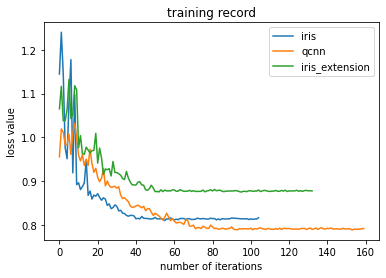

In [16]:
import matplotlib.pyplot as plt
plt.plot(np.arange(iteration_num_iris), loss_record_iris)
plt.plot(np.arange(iteration_num_qcnn), loss_record_qcnn)
plt.plot(np.arange(iteration_num_extension), loss_record_extension)

plt.xlabel("number of iterations")
plt.ylabel('loss value')
plt.title('training record')
plt.legend(['iris', 'qcnn', "iris_extension"])


print("final point for iris is {}, final training loss value is {}".format(result_iris.x, result_iris.fun))
print("final point for qcnn is {}, final training loss value is {}".format(result_qcnn.x, result_qcnn.fun))
print("final point for iris_extension is {}, final training loss value is {}".format(result_extension.x, result_extension.fun))



def gradient_descent(inital_params, batch_args, backend, eta=0.1, num_steps = 100): 
    parameters = cp.deepcopy(inital_params)
    for step in range(num_steps):
        deriv = []
        for i in range(len(parameters)): 
            for_parameters = cp.deepcopy(parameters)
            back_parameters = cp.deepcopy(parameters) 
            for_parameters[i] += 0.01
            back_parameters[i] -= 0.01
            deriv.append((evaluate_batch(batch_args, for_parameters, backend) -
                          evaluate_batch(batch_args, back_parameters, backend))/0.02) 
                
        parameters -= eta * np.array(deriv)
        print(step, evaluate_batch(batch_args, parameters, backend))
    return parameters
trained_parameters = gradient_descent(starting_params, training_args, backend)

In [17]:
num_instances = 5
starting_parameters_iris = [np.random.rand(8)*2*np.pi for i in range(num_instances)]
starting_parameters_qcnn = [np.random.rand(10)*2*np.pi for i in range(num_instances)]
starting_parameters_extension = [np.random.rand(12)*2*np.pi for i in range(num_instances)]


In [18]:
starting_parameters_iris

[array([3.93943502, 3.36174739, 2.0764446 , 6.24152905, 2.33236744,
        1.60299211, 2.98096482, 4.37960995]),
 array([1.72250042, 5.03107443, 0.02217508, 3.64620082, 3.74198831,
        1.13041446, 1.81680117, 3.64032153]),
 array([0.814574  , 4.2526429 , 2.93724152, 1.34271782, 1.99989192,
        2.7192869 , 5.12176354, 3.93230677]),
 array([1.77832028, 1.87476752, 0.38728052, 6.12082767, 4.58191366,
        1.27558256, 2.0466276 , 3.47019868]),
 array([2.45466964, 2.45307265, 2.82605929, 1.08501898, 0.42523013,
        5.93511428, 0.10494403, 2.13140472])]

In [19]:
starting_parameters_qcnn

[array([6.05903997, 5.57543686, 1.00219482, 1.33583045, 5.23916814,
        0.46215115, 3.32159354, 0.88756559, 1.14192307, 3.46812686]),
 array([3.1456791 , 2.68636599, 0.15445584, 0.03334096, 3.68231052,
        0.36685998, 4.67019724, 5.48909848, 5.61938306, 4.70570479]),
 array([2.61251655, 5.75910563, 2.55105521, 1.75311296, 6.07216021,
        2.27071295, 1.26054044, 3.58092213, 5.81950326, 0.29142152]),
 array([3.0845083 , 1.07887816, 0.34633866, 0.67140866, 1.41649852,
        4.40922027, 2.65172928, 2.9905973 , 2.70719294, 1.60946053]),
 array([5.30020692, 3.99210125, 6.27693401, 5.70028794, 3.06625369,
        4.24865105, 3.91245941, 0.72938156, 0.64590221, 5.76540484])]

In [20]:
starting_parameters_extension

[array([2.61953889, 0.1150866 , 1.97146294, 0.89774778, 2.85732404,
        4.69249801, 0.51917066, 4.49440206, 0.50808102, 1.38580237,
        3.7830017 , 1.69215468]),
 array([2.6525203 , 2.56926264, 6.2242974 , 4.02557554, 3.92638157,
        0.86869269, 4.7386404 , 3.86092069, 5.03220403, 1.78986531,
        0.49748058, 4.33087197]),
 array([5.05779682, 3.34772527, 0.18708064, 5.48044974, 6.07013052,
        3.26490087, 6.11053371, 3.41262117, 5.41052345, 1.75482737,
        6.09471397, 1.14474418]),
 array([5.89481303, 0.53223955, 2.33462614, 2.38951874, 3.86534505,
        1.17784948, 3.34311022, 1.39808155, 5.3687028 , 5.3875664 ,
        5.2183748 , 5.56283421]),
 array([1.14521738, 2.77008346, 3.56159146, 5.04162028, 3.37797036,
        0.87136816, 1.08139489, 5.14595742, 3.94704051, 1.70082648,
        4.00360284, 5.71032263])]

In [21]:
def optimization_parameters(starting_parameters, algorithm, training_args):
    iteration_nums = []
    parameters_records = []
    loss_records = []
    results = []
    
    for par in starting_parameters:
        iteration_num, parameters_record, loss_record, result = optimization_cobyla(par, algorithm, training_args)
        iteration_nums.append(iteration_num)
        parameters_records.append(parameters_record)
        loss_records.append(loss_record)
        results.append(result)  
    points = np.array([result.x.tolist() for result in results])
    
    return np.array(iteration_nums), np.array(parameters_records), np.array(loss_records), np.array(results), points

In [22]:
starting_parameters_iris

[array([3.93943502, 3.36174739, 2.0764446 , 6.24152905, 2.33236744,
        1.60299211, 2.98096482, 4.37960995]),
 array([1.72250042, 5.03107443, 0.02217508, 3.64620082, 3.74198831,
        1.13041446, 1.81680117, 3.64032153]),
 array([0.814574  , 4.2526429 , 2.93724152, 1.34271782, 1.99989192,
        2.7192869 , 5.12176354, 3.93230677]),
 array([1.77832028, 1.87476752, 0.38728052, 6.12082767, 4.58191366,
        1.27558256, 2.0466276 , 3.47019868]),
 array([2.45466964, 2.45307265, 2.82605929, 1.08501898, 0.42523013,
        5.93511428, 0.10494403, 2.13140472])]

In [23]:
iteration_nums_iris, parameters_records_iris, loss_records_iris, results_iris, points_iris = optimization_parameters(
                                                            starting_parameters_iris, evaluate_batch_iris, training_args)

C:\Users\Accesscode Talker\AppData\Local\Temp\ipykernel_18796\1354250236.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(iteration_nums), np.array(parameters_records), np.array(loss_records), np.array(results), points


In [24]:
iteration_nums_qcnn, parameters_records_qcnn, loss_records_qcnn, results_qcnn, points_qcnn = optimization_parameters(
                                                            starting_parameters_qcnn, evaluate_batch_qcnn, training_args)

C:\Users\Accesscode Talker\AppData\Local\Temp\ipykernel_18796\1354250236.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(iteration_nums), np.array(parameters_records), np.array(loss_records), np.array(results), points


In [25]:
iteration_nums_extension, parameters_records_extension, loss_records_extension, results_extension, points_extension = optimization_parameters(
                                                            starting_parameters_extension, evaluate_batch_extension, training_args)

C:\Users\Accesscode Talker\AppData\Local\Temp\ipykernel_18796\1354250236.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(iteration_nums), np.array(parameters_records), np.array(loss_records), np.array(results), points


In [26]:
def evalutaion_accuracy(testing_args, aalgorithm, point):
    backend = Aer.get_backend('qasm_simulator')
    confusion = np.zeros((3,3), dtype = int)
    for testing_arg in testing_args:
        dclass, loss = aalgorithm(angles[testing_arg], point, backend, real_classes[testing_arg])
        confusion[dclass, real_classes[testing_arg]] += 1
    accuracy = (confusion[0,0] + confusion[1,1] + confusion[2,2]) / np.sum(confusion.flatten())
    return accuracy

In [27]:
def evaluation_average_accuracy(num_instances, testing_args, aalgorithm, points):
    backend = Aer.get_backend('qasm_simulator')
    avg_confusion = np.zeros((3,3), dtype = int)
    for i in range(num_instances): 
        for testing_arg in testing_args:
            dclass, loss = aalgorithm(angles[testing_arg], points[i], backend, real_classes[testing_arg])
            avg_confusion[dclass, real_classes[testing_arg]] += 1
        
    avg_confusion = avg_confusion/float(num_instances)
    accuracy = (avg_confusion[0,0] + avg_confusion[1,1] + avg_confusion[2,2]) / np.sum(avg_confusion.flatten())
    return avg_confusion, accuracy

In [28]:
accuracies_iris = np.array([evalutaion_accuracy(testing_args, iris_evaluate, i) for i in points_iris])
accuracies_qcnn = np.array([evalutaion_accuracy(testing_args, qcnn_evaluate, i) for i in points_qcnn])
accuracies_iris_extension = np.array([evalutaion_accuracy(testing_args, iris_extension_evaluate, i) for i in points_extension])

In [29]:
accuracies_iris, accuracies_qcnn, accuracies_iris_extension

(array([0.91666667, 0.73333333, 0.85      , 0.86666667, 0.6       ]),
 array([0.86666667, 0.76666667, 0.96666667, 0.91666667, 0.78333333]),
 array([0.81666667, 0.95      , 0.83333333, 0.75      , 0.78333333]))

In [30]:
accuracies_iris.mean(), accuracies_iris.std()

(0.7933333333333333, 0.11382247385975916)

In [31]:
accuracies_qcnn.mean(), accuracies_qcnn.std()

(0.86, 0.07644896627453142)

In [32]:
accuracies_iris_extension.mean(), accuracies_iris_extension.std()

(0.8266666666666668, 0.06798692684790378)

In [33]:
avg_confusion_iris, acc_iris = evaluation_average_accuracy(num_instances, testing_args, iris_evaluate, points_iris)
avg_confusion_qcnn, acc_qcnn = evaluation_average_accuracy(num_instances, testing_args, qcnn_evaluate, points_qcnn)
avg_confusion_extension, acc_extension = evaluation_average_accuracy(num_instances, testing_args, iris_extension_evaluate, points_extension)

In [34]:
print("Accuracy for iris: {}".format(acc_iris))
print("Accuracy for qcnn: {}".format(acc_qcnn))
print("Accuracy for iris_extension: {}".format(acc_extension))

Accuracy for iris: 0.7900000000000001
Accuracy for qcnn: 0.8666666666666667
Accuracy for iris_extension: 0.8200000000000001


In [38]:
print("Accuracy variation for iris: {}".format(accuracies_iris.std()))
print("Accuracy variation for qcnn: {}".format(accuracies_qcnn.std()))
print("Accuracy variation for iris_extension: {}".format(accuracies_iris_extension.std()))

Accuracy variation for iris: 0.11382247385975916
Accuracy variation for qcnn: 0.07644896627453142
Accuracy variation for iris_extension: 0.06798692684790378


In [35]:
points_iris, avg_confusion_iris

(array([[ 5.72693485,  3.69892662,  2.35101449,  6.45847882,  1.19964699,
          2.8421584 ,  1.46258509,  5.45028803],
        [ 0.23512247,  6.71196424,  0.44651002,  3.0394715 ,  3.95432893,
          2.83416243,  1.08492652,  3.15284135],
        [ 0.34683459,  4.31231531,  3.2183311 ,  2.61199795,  3.43306836,
          2.43741057,  3.96001161,  3.54250901],
        [ 2.30126841,  1.17372094,  0.11218738,  6.76320719,  4.47783771,
          0.5781374 ,  3.62237985,  2.30259943],
        [ 2.25000491,  2.57697659,  3.35780039,  1.99854672,  1.45223014,
          5.02478501, -0.47647097,  1.85197844]]),
 array([[18.2,  0.2,  0.2],
        [ 0.4, 14. ,  4.6],
        [ 1.4,  5.8, 15.2]]))

In [36]:
points_qcnn, avg_confusion_qcnn

(array([[6.15278964, 5.332584  , 3.54893857, 4.09587673, 6.05163253,
         2.37972881, 4.8706871 , 1.32903576, 1.78783773, 3.42372007],
        [4.91755886, 3.41706429, 1.98969801, 1.80374827, 3.25051931,
         1.19773996, 4.38896736, 6.86301699, 5.09484469, 4.63121802],
        [3.29397489, 6.08072189, 1.21402101, 2.54553413, 8.07026684,
         4.20477692, 1.114866  , 3.03677386, 4.72952246, 0.17004817],
        [3.72140203, 2.61666775, 1.62003373, 2.11882947, 2.40223016,
         6.16308885, 4.33363034, 2.6356706 , 4.66307361, 0.90778167],
        [6.26016252, 6.08002169, 8.08732237, 5.31930016, 3.69216297,
         6.43076259, 4.75321388, 0.51025827, 1.56964778, 5.27259214]]),
 array([[18.8,  0.2,  0.2],
        [ 0.8, 18.6,  5.2],
        [ 0.4,  1.2, 14.6]]))

In [37]:
points_extension, avg_confusion_extension

(array([[ 2.92389977, -0.79441749,  3.63463524, -1.44686822,  3.41557713,
          3.96821913,  0.48024091,  6.54279629, -0.04733268,  0.613952  ,
          5.30815473,  0.6287461 ],
        [ 3.84583743,  1.70962148,  5.93933518,  4.19960034,  3.95027169,
          2.02933472,  5.42097307,  4.00790649,  5.41496588,  0.83013949,
         -1.51219432,  3.66439185],
        [ 5.75243183,  3.32962479,  2.14515596,  5.24098453,  6.38423239,
          3.73466112,  7.26163499,  4.12745767,  5.57739567,  2.44202464,
          5.21658442,  0.81718581],
        [ 6.82475313,  0.53809497,  2.97024712,  2.19128206,  4.55728272,
          0.93258353,  3.80937836,  1.07816151,  6.3260829 ,  5.50577933,
          4.91791706,  5.43190062],
        [ 0.71151503,  3.4211951 ,  4.58626417,  6.28265822,  4.08336152,
          0.38807369,  2.1397345 ,  5.65878342,  3.6318162 ,  1.1410768 ,
          5.28285149,  4.83251994]]),
 array([[17.8,  0.4,  1.6],
        [ 2. , 16.4,  3.4],
        [ 0.2,  3.2, 1